# Análise exploratória de dados

In [8]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown


## 1. Descrição dos dados



Uma das coisas mais importantes para qualquer tipo de negócio é que os clientes continuem uitlizando seus produtos. Bancos enfrentam o desafio de reduzir a perda de clientes. A rotatividade de clientes do banco, refere-se à taxa na qual os clientes decidem encerrar seu relacionamento com a instituição financeira, também conhecido como churn. Entender essa rotatividade, e como reduzi-lá, é importante para as empresas que buscam expandir seus negócios e construir vínculos com os clientes.
Por isso urge a necessidade de compreender e explorar estratégias que irão fazer com que o banco mantenha seus clientes.
Para isso, a análise dos dados é a principal ferramenta para identificar padrões e fatores associados ao problema para, a partir disso, tomar ações com objetivo de mitigá-lo.

## 2 - Dicionário de Dados

In [4]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,RowNumber,O número sequencial atribuído a cada linha,Inutil,NaN
1,CustomerId,Identificador único do cliente,Quantitativa,Discreta
2,Surname,Sobrenome do Cliente,Inutil,NaN
3,CreditScore,Pontuação de crédito do cliente,Quantitativa,Discreta
4,Geography,Localização geográfica do cliente,Qualitativa,Nominal
5,Gender,Genero do Cliente,Qualitativa,Nominal
6,Age,Idade do Cliente,Quantitativa,Discreta
7,Tenure,O número de anos que o cliente está no banco,Quantitiva,Discreta
8,Balance,Saldo da conta do cliente,Quantitativa,Continua
9,NumOfProducts,Número de produtos bancários que o cliente possui,Quantitativa,Discreta


## 2.1 Variáveis

In [11]:
quantitativas_discretas = dicionario[(dicionario['tipo'] == 'Quantitativa') & (dicionario['subtipo'] == 'Discreta')].shape[0]
quantitativas_continuas = dicionario[(dicionario['tipo'] == 'Quantitativa') & (dicionario['subtipo'] == 'Contínua')].shape[0]
qualitativas_nominais = dicionario[(dicionario['tipo'] == 'Qualitativa') & (dicionario['subtipo'] == 'Nominal')].shape[0]
qualitativas_ordinais = dicionario[(dicionario['tipo'] == 'Qualitativa') & (dicionario['subtipo'] == 'Ordinal')].shape[0]

quantidade_qualitativa = qualitativas_nominais + qualitativas_ordinais
quantidade_quantitativa = quantitativas_continuas + quantitativas_discretas

display(Markdown(f"""
---
 - São {dicionario.shape[0]} variáveis: {quantidade_qualitativa} qualitativas e {quantidade_quantitativa} quantitativas e 1 variável inútil;
    - Qualitativas: {qualitativas_nominais} nominais e {qualitativas_ordinais} ordinais;
    - Quantitativas: {quantitativas_continuas} contínuas e {quantitativas_discretas} discretas;
---
"""))


---
 - São 14 variáveis: 5 qualitativas e 5 quantitativas e 1 variável inútil;
    - Qualitativas: 5 nominais e 0 ordinais;
    - Quantitativas: 1 contínuas e 4 discretas;
---


## 3. Entendimento Inicial dos Dados

In [14]:
df = pd.read_csv('../data/raw/Churn_Modelling.csv')
df_dict = pd.read_csv('../data/raw/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3.1 Analise da variavel Balance que mostra o saldo dos clientes

In [ ]:
# Contagem de linhas onde 'Balance' é igual a 0
balance_zero = len(df[df['Balance'] == 0])


# Contagem de linhas onde 'Balance' não é igual a 0
balance_non_zero = len(df[df['Balance'] != 0])

print(f"Numero de clientes com saldo igual a 0: {balance_zero}")
print(f"Numero de clientes com saldo diferente de 0: {balance_non_zero}")

Numero de clientes com saldo igual a 0: 3617
Numero de clientes com saldo diferente de 0: 6383


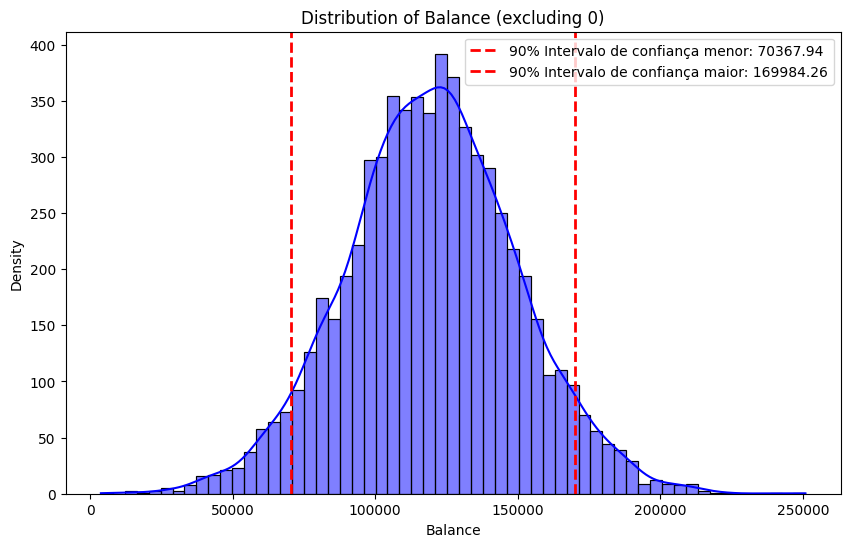

In [ ]:
# Grafico de distribuição normal e tambem a concentração de 90% dos dados
# Filter out rows where 'Balance' is 0
df_filtered = df[df['Balance'] != 0]

# Create the distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['Balance'], kde=True, color='blue')
plt.title('Distribution of Balance (excluding 0)')
plt.xlabel('Balance')
plt.ylabel('Density')

# Calculate the 90% confidence interval
balance_90_lower = np.percentile(df_filtered['Balance'], 5)
balance_90_upper = np.percentile(df_filtered['Balance'], 95)

# Add vertical lines for the 90% interval
plt.axvline(balance_90_lower, color='red', linestyle='dashed', linewidth=2, label=f'90% Intervalo de confiança menor: {balance_90_lower:.2f}')
plt.axvline(balance_90_upper, color='red', linestyle='dashed', linewidth=2, label=f'90% Intervalo de confiança maior: {balance_90_upper:.2f}')

plt.legend()
plt.show()

90% dos saldos (não nulos) dos clientes estão aproximadamente entre 70.000 e 170.000 euros.

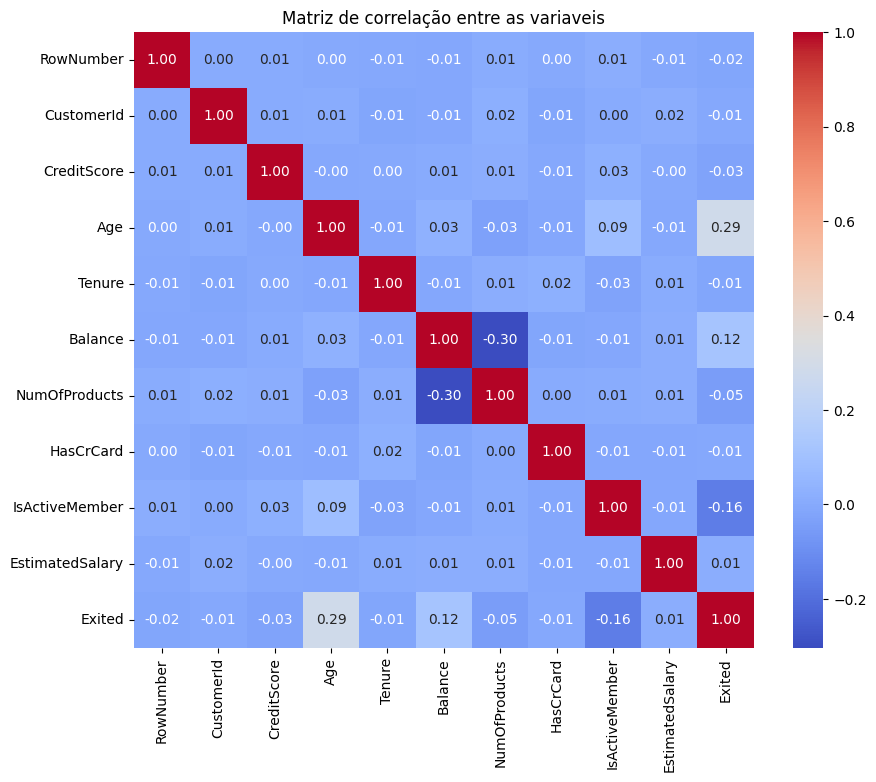

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlação entre as variaveis')
plt.show()

In [22]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Contagem da coluna 'Exited'

In [24]:
order = 0
for i, variavel in enumerate(dicionario.query("tipo == 'Qualitativa'").variavel.to_list()):
  if dicionario.query('variavel == @variavel').subtipo.to_list()[0] == 'Nominal':
    order = df[variavel].value_counts()

print(order)

Exited
0    7963
1    2037
Name: count, dtype: int64


## 4. Distribuição de Variáveis

Qualitativas

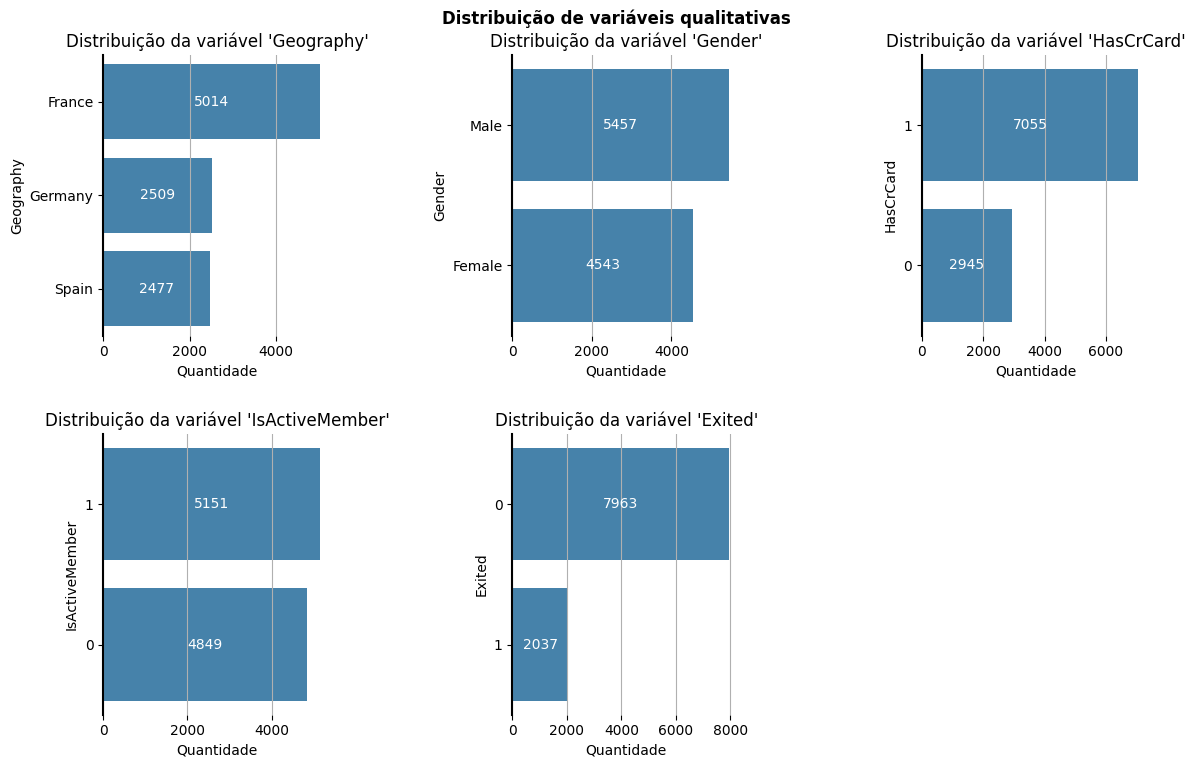

In [26]:
# Configura os subplots em uma grade 2x3
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold')

# Filtra e plota apenas as 5 primeiras variáveis qualitativas
for i, variavel in enumerate(dicionario.query("tipo == 'Qualitativa'").variavel.to_list()[:5]):
    order = None
    if dicionario.query('variavel == @variavel').subtipo.to_list()[0] == 'Nominal':
        order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        y=variavel,
        ax=axes.flatten()[i],
        #color=colors[0],
        alpha=0.9,
        order=order,
        orient='h'
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.axvline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_xlabel('Quantidade')
    ax.grid(axis='x', linestyle='-')

fig.delaxes(axes[1, 2])

plt.show()

Observações gerais sobre a distribuição das variáveis qualitativas:

Geography: A maioria dos clientes está localizada na França, seguida por Espanha e Alemanha.
Gender: Há uma quantidade praticamente igual de clientes do gênero masculino e feminino, o que sugere um equilíbrio razoável na amostra.
HasCrCard: A maioria dos clientes possui um cartão de crédito.
IsActiveMember: Existe uma quantidade significativa de clientes que são membros ativos e inativos.
Exited: Uma porção significativa de clientes decidiu sair do banco.

Quantitativas

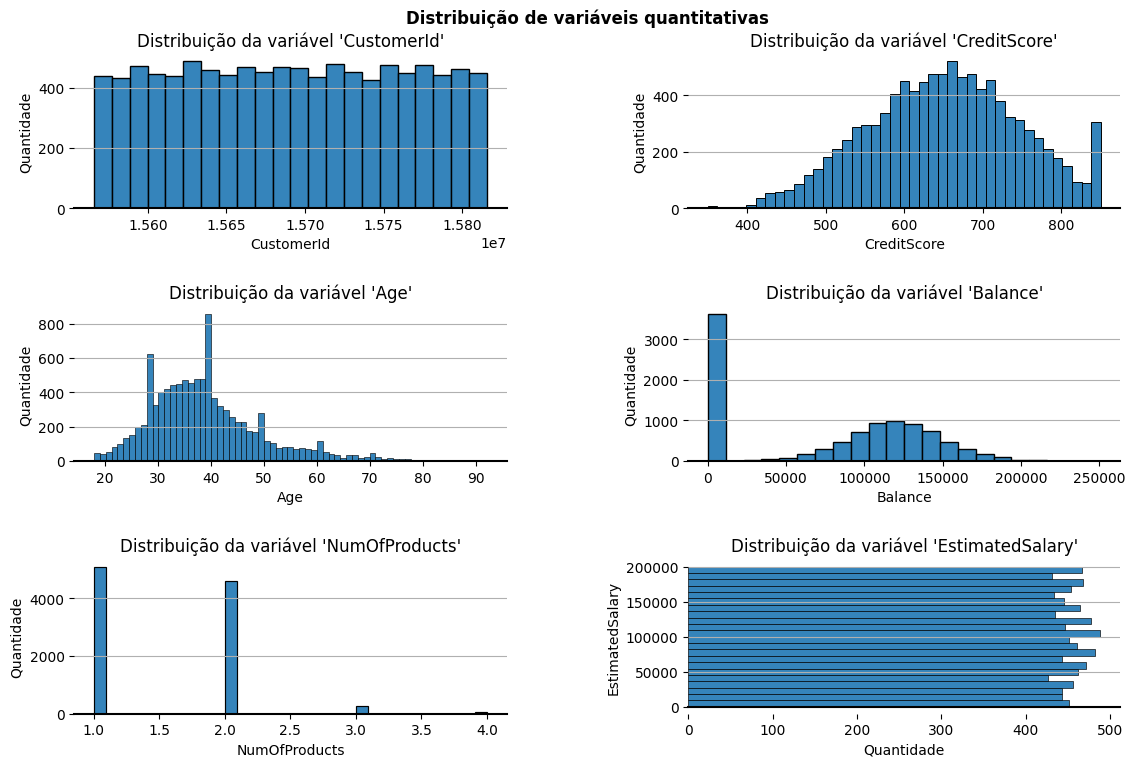

In [28]:
# Configura os subplots em uma grade 3x2
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')

# Filtra e plota apenas as variáveis quantitativas
variaveis = dicionario.query("tipo == 'Quantitativa'").variavel.to_list()

for i, variavel in enumerate(variaveis):
    if i < len(axes.flatten()):  # Verifica para evitar erro se houver mais variáveis do que subplots
        ax = axes.flatten()[i]

        # Verifica se é o último subplot para definir a orientação
        if i == len(variaveis) - 1:  # Último gráfico
            sns.histplot(
                data=df,
                y=variavel,  # Altera para o eixo y no último subplot
                ax=ax,
                alpha=0.9,
                #color=colors[0]
            )
            ax.set_xlabel('Quantidade')
            ax.set_ylabel(variavel)
        else:
            sns.histplot(
                data=df,
                x=variavel,
                ax=ax,
                alpha=0.9,
                #color=colors[0]
            )
            ax.set_xlabel(variavel)
            ax.set_ylabel('Quantidade')

        ax.set(frame_on=False)
        ax.axhline(0, color="k", clip_on=False)
        ax.set_title(f"Distribuição da variável '{variavel}'")
        ax.grid(axis='y', linestyle='-')  # Mostra apenas linhas verticais

plt.show()


Observações sobre os gráficos das variáveis quantitativas:
CreditScore: A distribuição da pontuação de crédito parece ser aproximadamente normal, com uma concentração na faixa de 600 a 800.

Age: A distribuição de idades apresenta uma forma ligeiramente assimétrica à direita (ou seja, há mais clientes mais jovens). A maior concentração está entre 30 e 50 anos.

Tenure: A distribuição do tempo de relacionamento com o banco parece ser um pouco irregular. Há uma concentração maior em alguns pontos (0, 2, 7-10 anos) e outras faixas com menos clientes.

Balance: A distribuição dos saldos das contas apresenta uma assimetria positiva.

NumOfProducts: A maioria dos clientes possui 1 ou 2 produtos bancários.

EstimatedSalary: A distribuição salarial parece aproximadamente uniforme com maior concentração na faixa central, indicando que pode haver uma variação considerável entre os salários dos clientes.

## 5. Perguntas de partida e hipóteses

Qual a taxa de evasão?

Qual país com mais clientes evadidos?

O credit score baixo influencia os clientes desistirem do banco?

Qual a relação entre o número de produtos bancários utilizados pelo cliente e a probabilidade de evasão?

Qual variavel tem maior correlação com a permanência do cliente?

Qual faixa etaria possui maior evasão?

Qual a taxa de evasão?

In [30]:
countsExited = df['Exited'].value_counts()
taxaDeEvasao = countsExited[1] / len(df)
taxaDeEvasao

np.float64(0.2037)

20% dos clientes da base de dados saíram do banco

Pergunta 2: Qual país com mais clientes evadidos?

In [31]:
country_counts = df['Geography'].value_counts()
country_counts

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

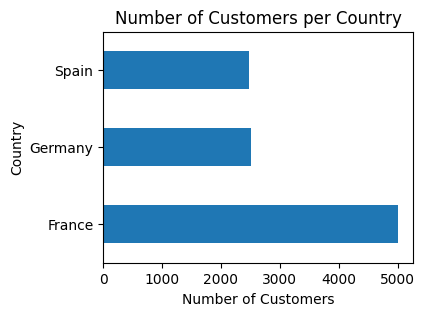

In [32]:
plt.figure(figsize=(4, 3))
country_counts.plot(kind='barh')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.title('Number of Customers per Country')
plt.show()

A frança é o país com maior número de clientes evadidos, com metade do total da base de dados. Os outros 2 países possuem cada um, aproximadamente 25% do total.

Pergunta 3: O credit score baixo influencia os clientes a desistirem do banco?

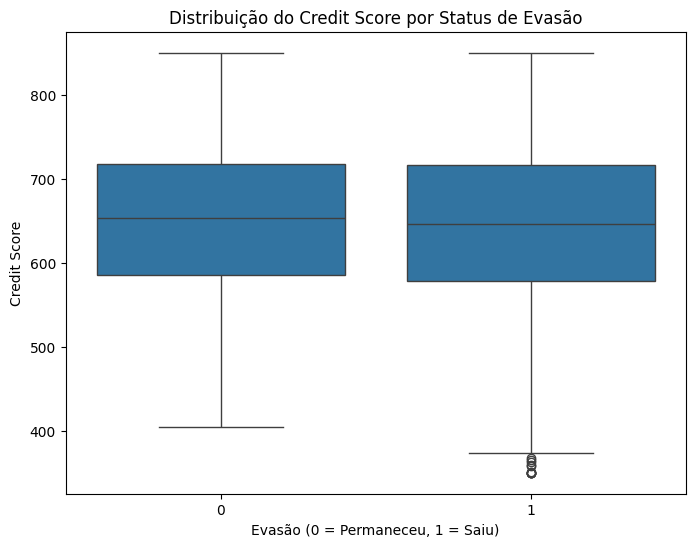

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('Distribuição do Credit Score por Status de Evasão')
plt.xlabel('Evasão (0 = Permaneceu, 1 = Saiu)')
plt.ylabel('Credit Score')
plt.show()


A partir do boxplot, não há uma diferença clara na distribuição de Credit Score entre os clientes que saíram e os que estão no banco. As medianas e os quartis estão próximos, sugerindo que o Credit Score, isoladamente, não parece ser um fator determinante para a saída dos clientes do banco.

Pergunta 4: Qual a relação entre o número de produtos bancários utilizados pelo cliente e a probabilidade de evasão?

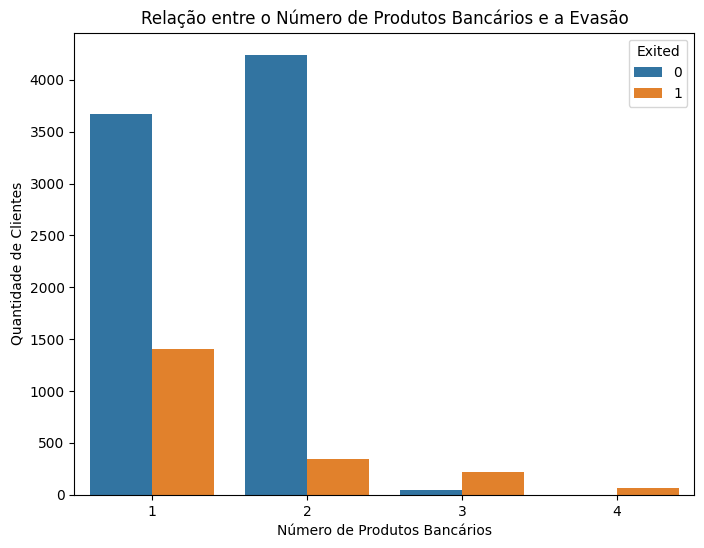

In [35]:

plt.figure(figsize=(8, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Relação entre o Número de Produtos Bancários e a Evasão')
plt.xlabel('Número de Produtos Bancários')
plt.ylabel('Quantidade de Clientes')
plt.show()

A partir das visualizações acima podemos dizer que:
- A maioria dos clientes que saíram do banco possui apenas 1 produto bancário.
- Clientes com 2 produtos também apresentam uma taxa considerável de evasão.
- Clientes com 3 ou 4 produtos bancários possuem o menor número de evasão.


Pergunta 5: Qual variavel tem maior correlação com a permanência do cliente?

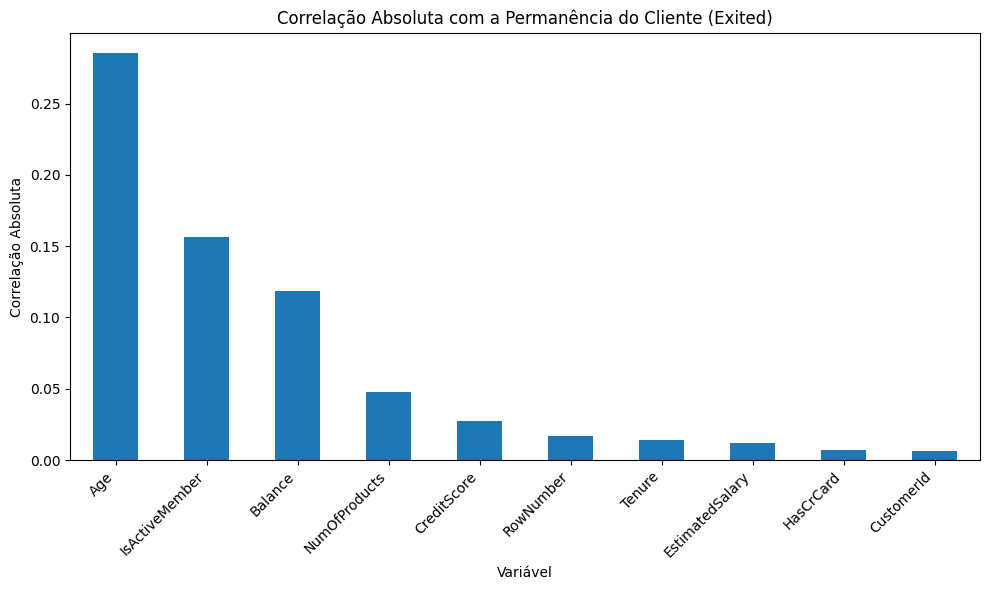

In [36]:
plt.figure(figsize=(10, 6))
correlations_with_exited.abs().sort_values(ascending=False).plot(kind='bar')
plt.title('Correlação Absoluta com a Permanência do Cliente (Exited)')
plt.xlabel('Variável')
plt.ylabel('Correlação Absoluta')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

A partir das visualizações acima podemos dizer que:

- A variável 'Age' tem a maior correlação com a permanência do cliente (Exited), seguida de 'Balance' e 'NumOfProducts'. A correlação não é muito forte, mas indica uma relação entre essas variáveis e a probabilidade do cliente sair do banco.

Pergunta 6: Qual faixa etaria possui maior evasão?

C:\Users\myle_\AppData\Local\Temp\ipykernel_9788\2148763359.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')


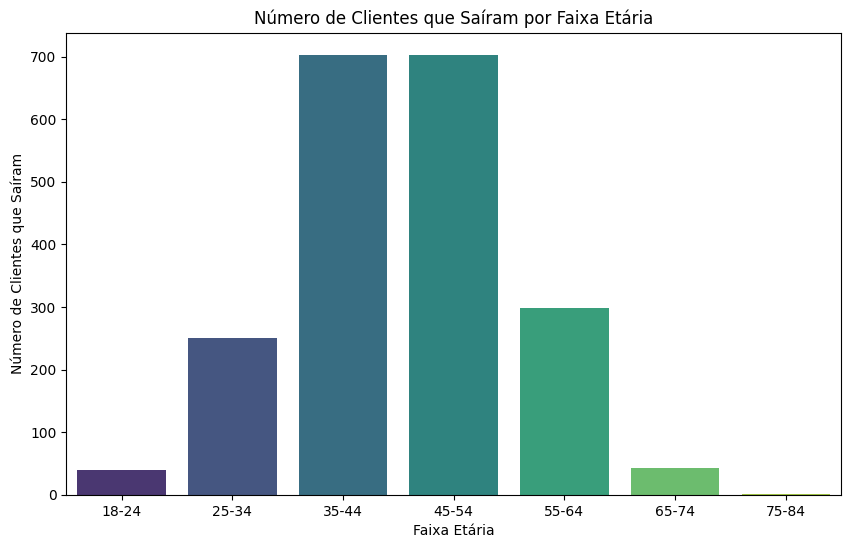

In [38]:
# Definir as faixas etárias
bins = [18, 25, 35, 45, 55, 65, 75, 85]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84']

# Criar uma nova coluna 'AgeGroup' no dataframe
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Contar o número de clientes que saíram em cada faixa etária
age_group_counts = df[df['Exited'] == 1]['AgeGroup'].value_counts().sort_index()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')
plt.title('Número de Clientes que Saíram por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Clientes que Saíram')
plt.show()

In [ ]:
Observação:
A faixa etária de 35-44 anos apresenta o maior número de clientes que saíram do banco, seguida de perto pela faixa etária de 45-54 anos. Isso sugere que clientes nessas faixas etárias podem estar mais propensos a deixar o banco, e estratégias específicas de retenção podem ser necessárias para esses grupos.

## 3. Insights

1. Aproximadamente 20% dos clientes analisados deixaram o banco, uma proporção significativa que destaca a necessidade de estratégias específicas para melhorar a retenção e reduzir o churn.

2. A maior parte da base de clientes está concentrada na França, seguida pela Espanha e Alemanha. A França também apresenta a maior taxa de evasão, o que sugere a necessidade de investigar se essa alta concentração de clientes impacta diretamente o índice de churn observado no país.

3. A análise preliminar com um boxplot não revelou uma correlação direta entre o Credit Score e a evasão. Apesar disso, uma análise mais aprofundada que leve em conta faixas de pontuação e o histórico de crédito pode fornecer insights adicionais sobre possíveis relações.

4. A relação entre a posse de um cartão de crédito e a evasão ainda não foi diretamente explorada. Comparar as taxas de churn entre clientes com e sem cartão de crédito pode ajudar a identificar possíveis padrões relevantes.

5. A idade (Age) apresenta a maior correlação com a evasão, seguida pelo saldo em conta (Balance) e pelo número de produtos bancários utilizados (NumOfProducts). Embora a correlação não seja extremamente forte, esses fatores se mostram importantes para prever o churn e devem ser analisados mais profundamente junto a outras variáveis.

6. Clientes na faixa etária de 40 a 50 anos e acima de 60 anos apresentam as maiores taxas de evasão. Esses grupos demandam atenção para identificar as motivações por trás do churn. Criar subfaixas etárias mais específicas poderia permitir uma análise mais detalhada e direcionada.

7. Clientes com apenas 1 produto bancário exibem a maior taxa de evasão. Isso indica a necessidade de incentivar esses clientes a utilizarem mais produtos bancários, aumentando seu engajamento. Estratégias como oferecer produtos complementares ou benefícios exclusivos podem ser eficazes nesse grupo.
